## Overview
Automated methods to detect and classify human diseases from medical images.

## Data Description
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

You can find the dataset here.

## Files
**test**
1. NORMAL
2. PNEUMONIA

**train**
1. NORMAL
2. PNEUMONIA

**val**
1. NORMAL
2. PNEUMONIA

## So let’s begin here…

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

import os

Using TensorFlow backend.


## Load Data

In [2]:
train_folder= '../input/chest-xray-pneumonia/chest_xray/train/'
val_folder = '../input/chest-xray-pneumonia/chest_xray/val/'
test_folder = '../input/chest-xray-pneumonia/chest_xray/test/'

### Train Data

In [3]:
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

## Let's have a look at our data

Text(0.5, 1.0, 'Pneumonia')

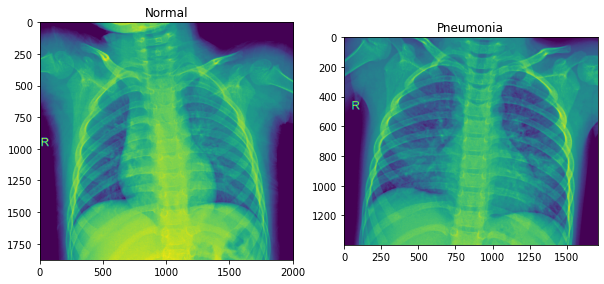

In [4]:
#Normal pic 
rand_norm = np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
norm_pic_address = train_n + norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
pne_pic =  os.listdir(train_p)[rand_p]
pne_pic_address = train_p + pne_pic

#Let's plot these images
f = plt.figure(figsize= (10,6))

a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(Image.open(norm_pic_address))
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(Image.open(pne_pic_address))
a2.set_title('Pneumonia')

## Defining Model

In [5]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(32, (3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(activation = 'relu', units = 128))
cnn_model.add(Dense(activation = 'sigmoid', units = 1))

## Compile Model

In [6]:
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_set = train_datagen.flow_from_directory(train_folder,
                                              target_size = (64, 64),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Fit Model

In [9]:
cnn_model_his = cnn_model.fit_generator(train_set,
                              steps_per_epoch = 163,
                              epochs = 10,
                              validation_data = validation_generator,
                              validation_steps = 624)

Epoch 1/10
163/163 [==============================] - 238s 1s/step - loss: 0.3814 - accuracy: 0.8351 - val_loss: 0.4382 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 211s 1s/step - loss: 0.2354 - accuracy: 0.9045 - val_loss: 0.5071 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 217s 1s/step - loss: 0.2123 - accuracy: 0.9160 - val_loss: 0.4330 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 213s 1s/step - loss: 0.1862 - accuracy: 0.9231 - val_loss: 0.3393 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 208s 1s/step - loss: 0.1732 - accuracy: 0.9302 - val_loss: 0.4586 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 209s 1s/step - loss: 0.1601 - accuracy: 0.9388 - val_loss: 0.4599 - val_accuracy: 0.6875
Epoch 7/10
163/163 [==============================] - 208s 1s/step - loss: 0.1600 - accuracy: 0.9344 - val_loss: 0.5183 - val_accuracy: 0.7500

## Evaluate Model

### Accuracy

In [10]:
test_acc = cnn_model.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_acc[1]*100, '%')

The testing accuracy is : 91.36195778846741 %


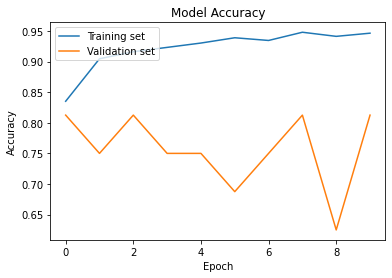

In [11]:
plt.plot(cnn_model_his.history['accuracy'])
plt.plot(cnn_model_his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

### Loss

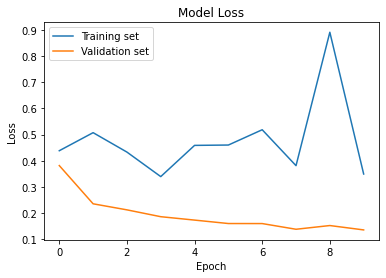

In [12]:
plt.plot(cnn_model_his.history['val_loss'])
plt.plot(cnn_model_his.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()